# Simple classification

In [1]:
# import modules and data file

%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import os

fruits = pd.read_table('/Users/riro/Documents/GitHub/umich_ds/ml/fruit_data_with_colors.txt')

fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [2]:
# create a mapping from fruit label value to fruit name for readability

lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

The file contains the mass, height, and width of a selection of oranges, lemons and apples. The heights were measured along the core of the fruit. The widths were the widest width perpendicular to the height.

## Create train-test split

In [3]:
# use the mass, width, and height features of each fruit instance

X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

# default split is 75% / 25% train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Examining the data

<IPython.core.display.Javascript object>


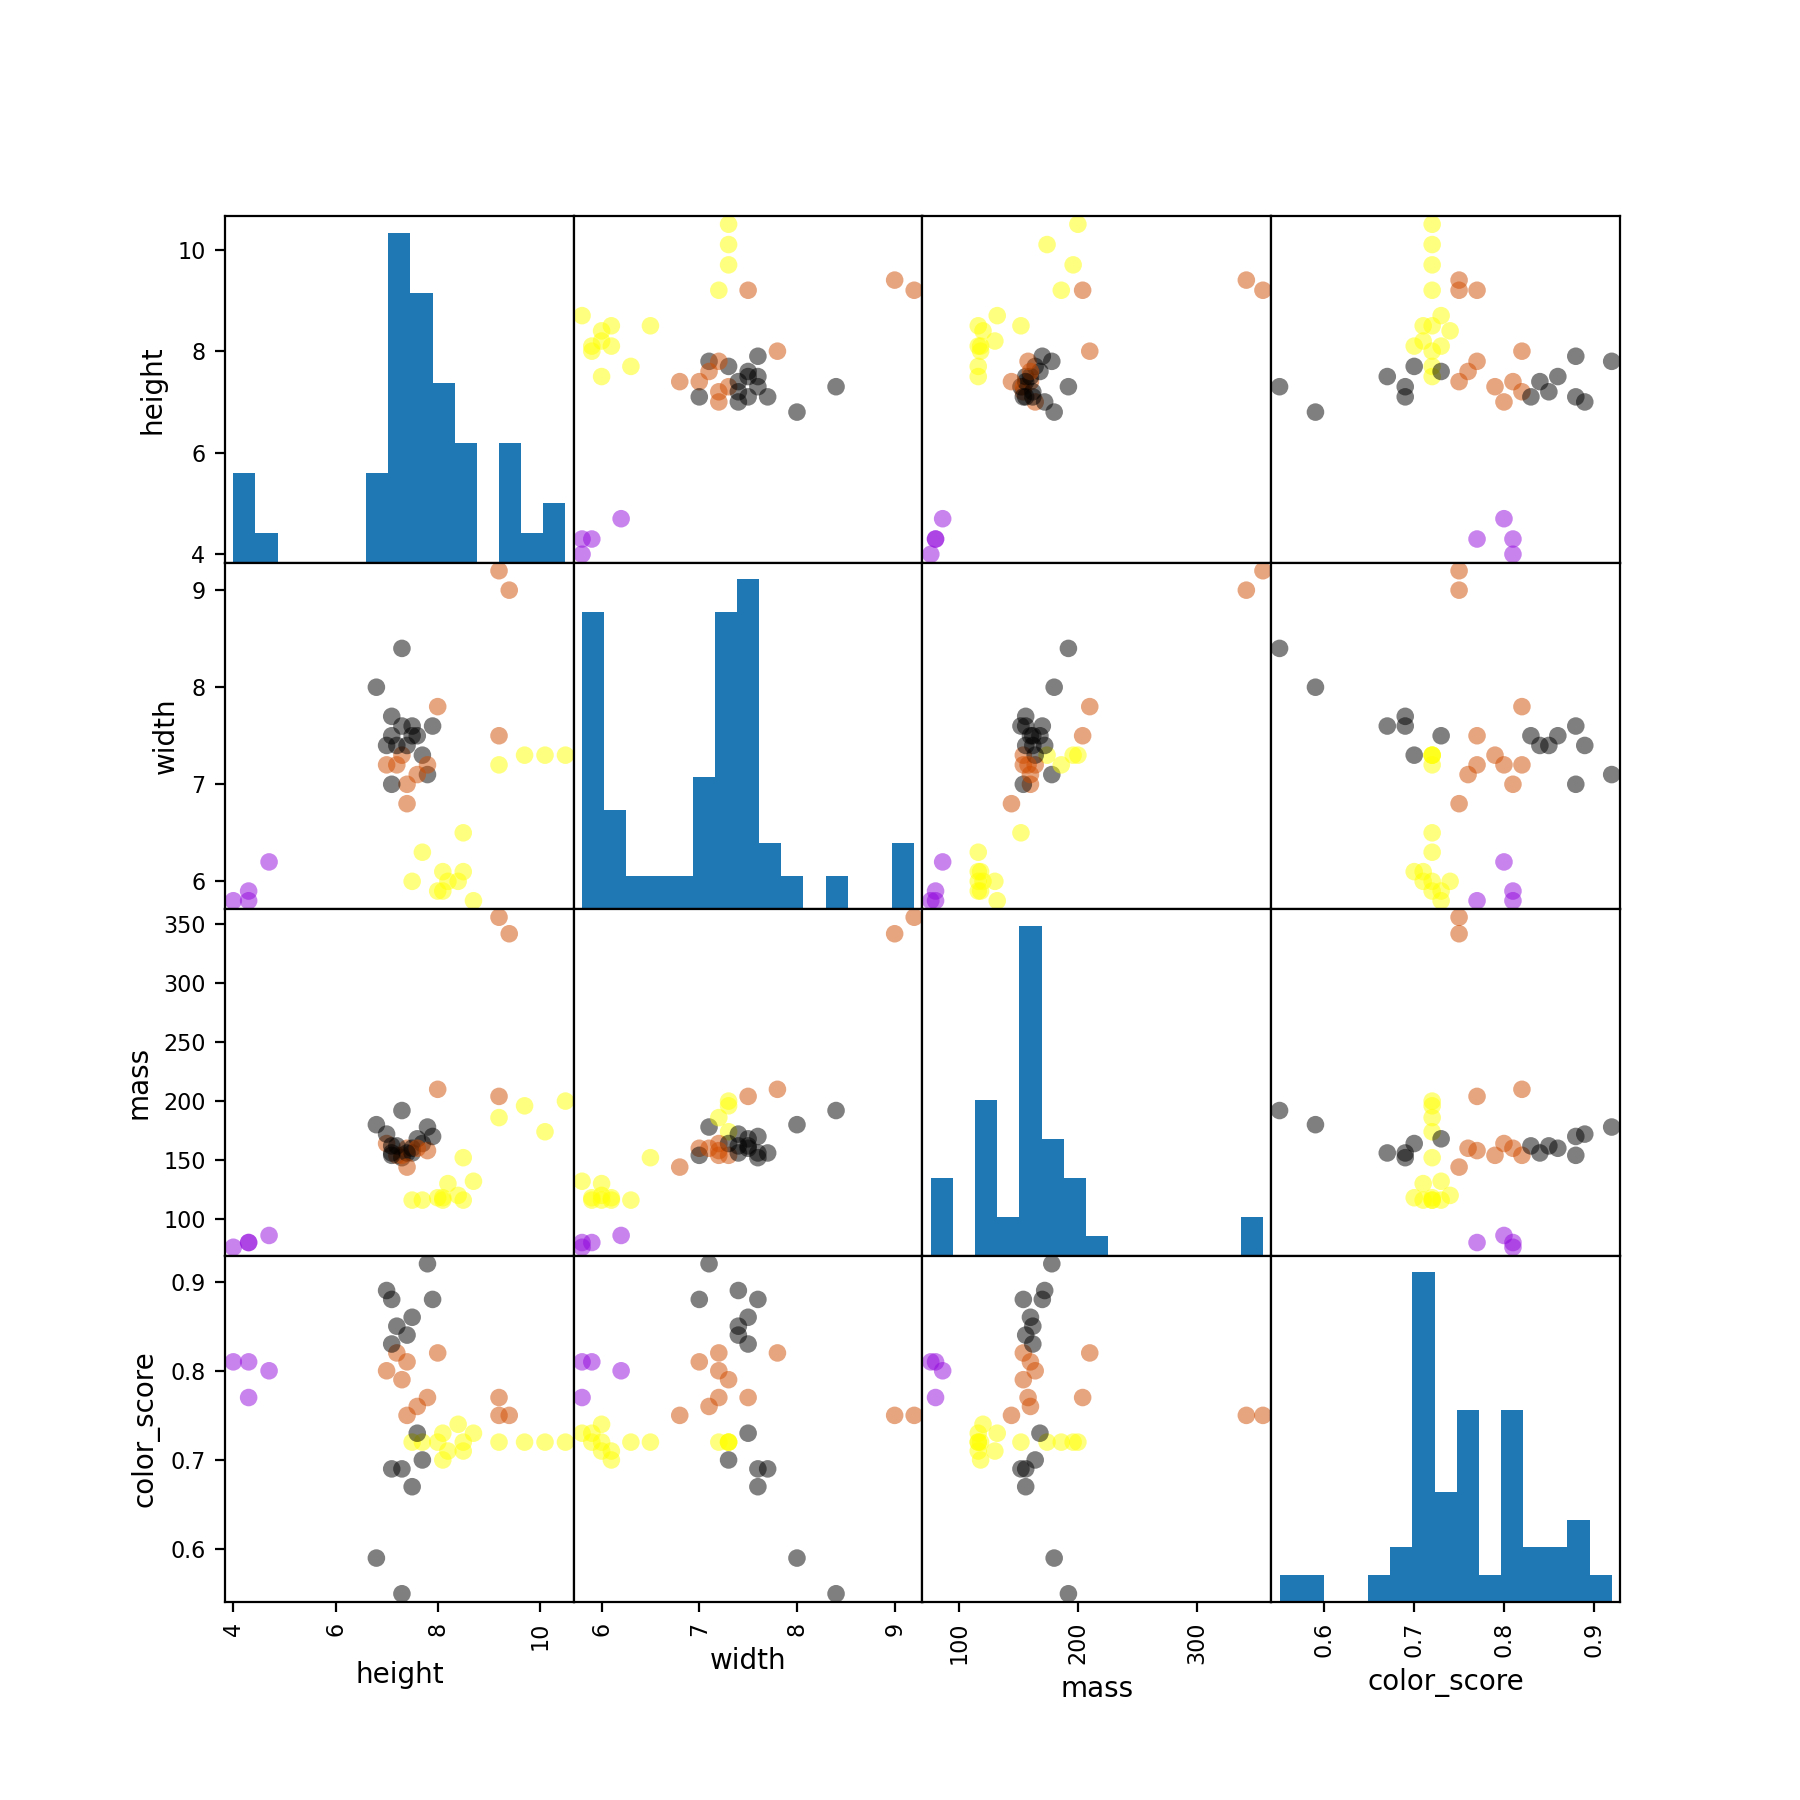

In [12]:
# plotting a scatter matrix
from matplotlib import cm

X = fruits[['height', 'width', 'mass', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c=y_train, marker='o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

<IPython.core.display.Javascript object>


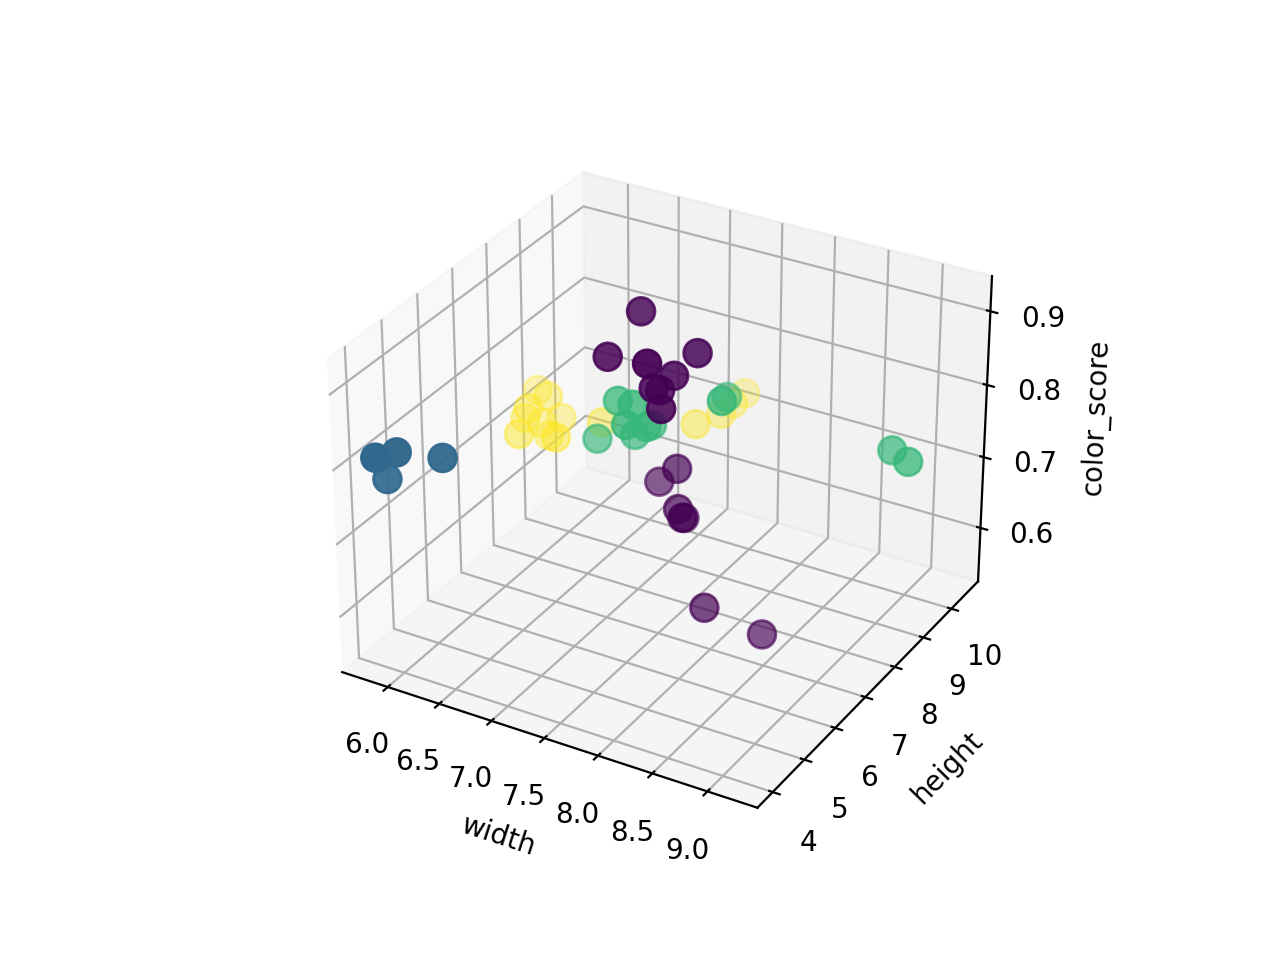

In [13]:
# create a 3-D scatter plot

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker='o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

### Create a classifier object

In [6]:
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

# default split is 75% / 25% train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

### Train the classifier (fit the estimator) using the training data

In [7]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

### Estimate the accuracy of the classifier on future data, using the test data

In [8]:
knn.score(X_test, y_test)

0.5333333333333333

### Use the trained k-NN classifier model to classify new, previously unseen objects

In [9]:
# predict a small fruit with mass  20g, width 4.3 cm, height 5.5 cm

fruit_prediction = knn.predict([[20, 4.3, 5.5]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [10]:
# predict a larger, elongated fruit with mass 100g, width 6.3 cm, height 8.5 cm

fruit_prediction = knn.predict([[100, 6.3, 8.5]])
lookup_fruit_name[fruit_prediction[0]]

'lemon'

### Plot the decision boundaries of the k-NN classifier

<IPython.core.display.Javascript object>


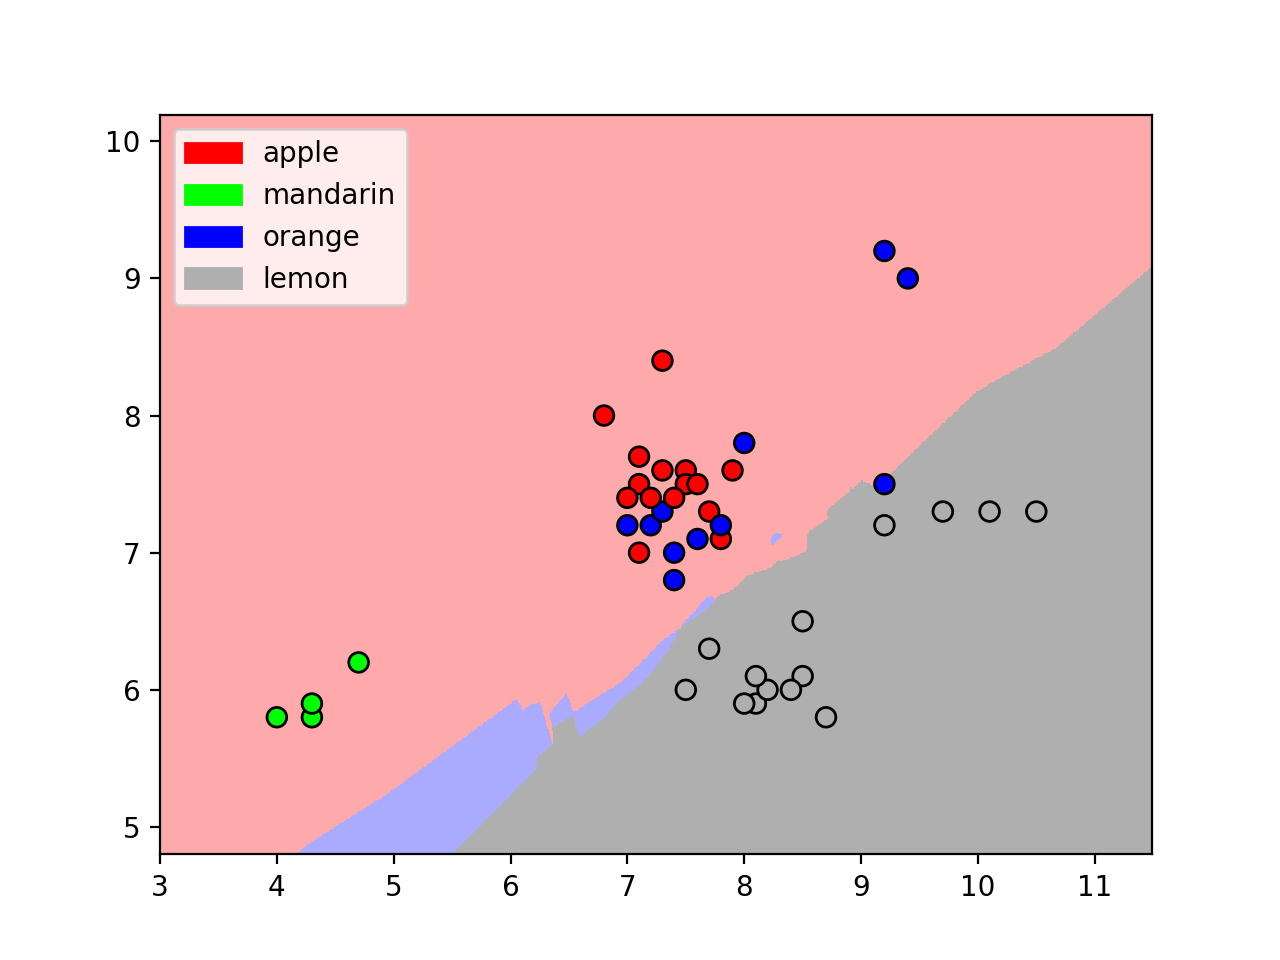

<ipython-input-28-493ecf073f4e>:36: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


In [28]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import matplotlib.patches as mpatches

X = fruits[['mass', 'width', 'height', 'color_score']]
y = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

def plot_fruit_knn(X, y, n_neighbors, weights):
    X_mat = X[['height', 'width']].values
    y_mat = y.values
    
    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)
    
    # Plot the decision boundary by assigning a color in the color map
    # to each mesh point.

    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50

    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
    patch2 = mpatches.Patch(color='#0000FF', label='orange')
    patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])

plt.xlabel('height (cm)')
plt.ylabel('width (cm)')

#plt.title("4-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights))    

plt.show()
plot_fruit_knn(X_train, y_train, 20, 'uniform')

### How sensitive is k-NN classification accuracy to the choice of the 'k' parameter

<IPython.core.display.Javascript object>


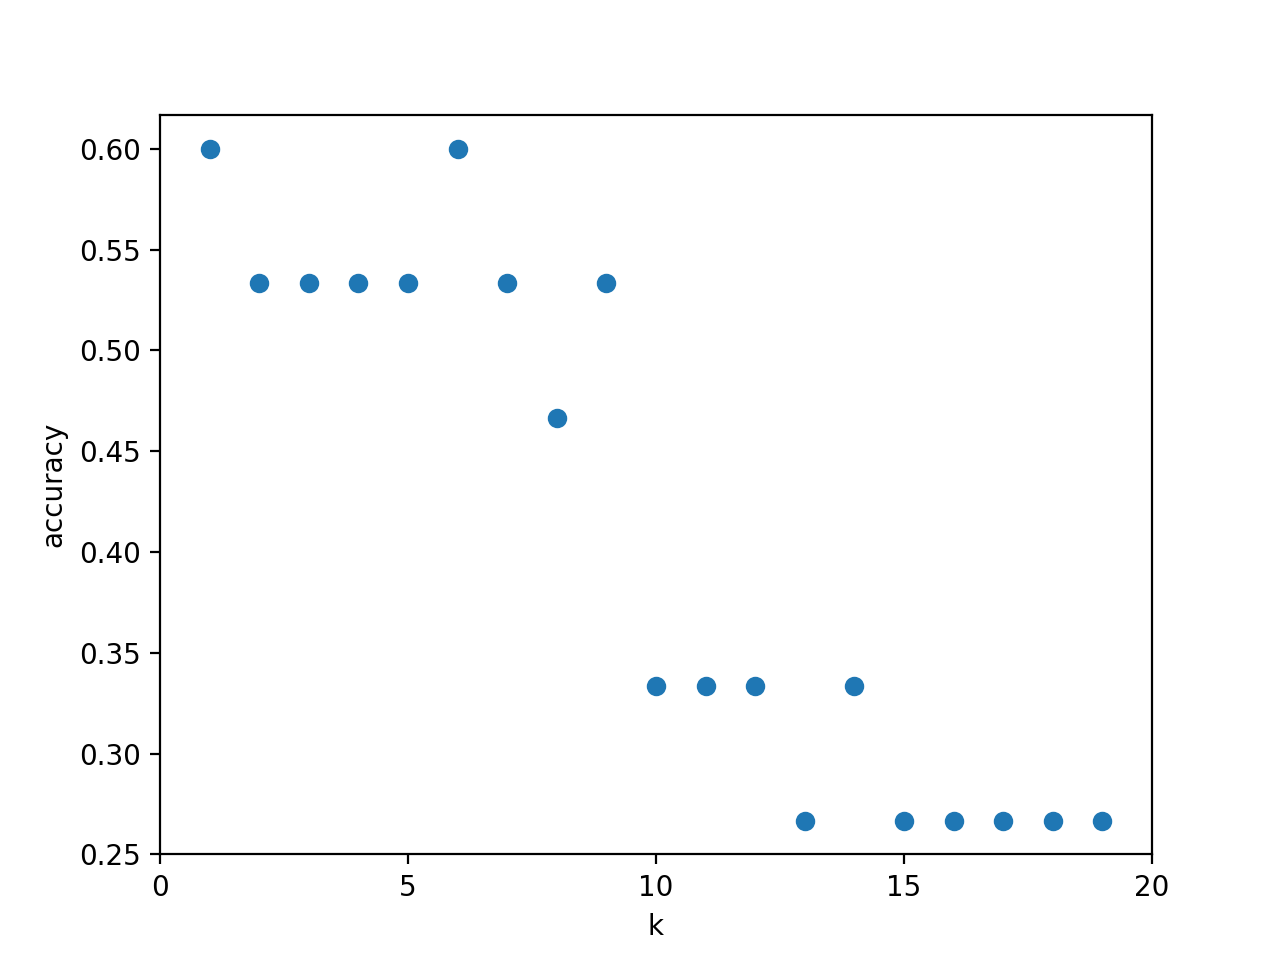

In [20]:
k_range = range(1, 20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
    
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0, 5, 10, 15, 20]);

### How sensitive is k-NN classification accuracy to the train/test split proportion

<IPython.core.display.Javascript object>


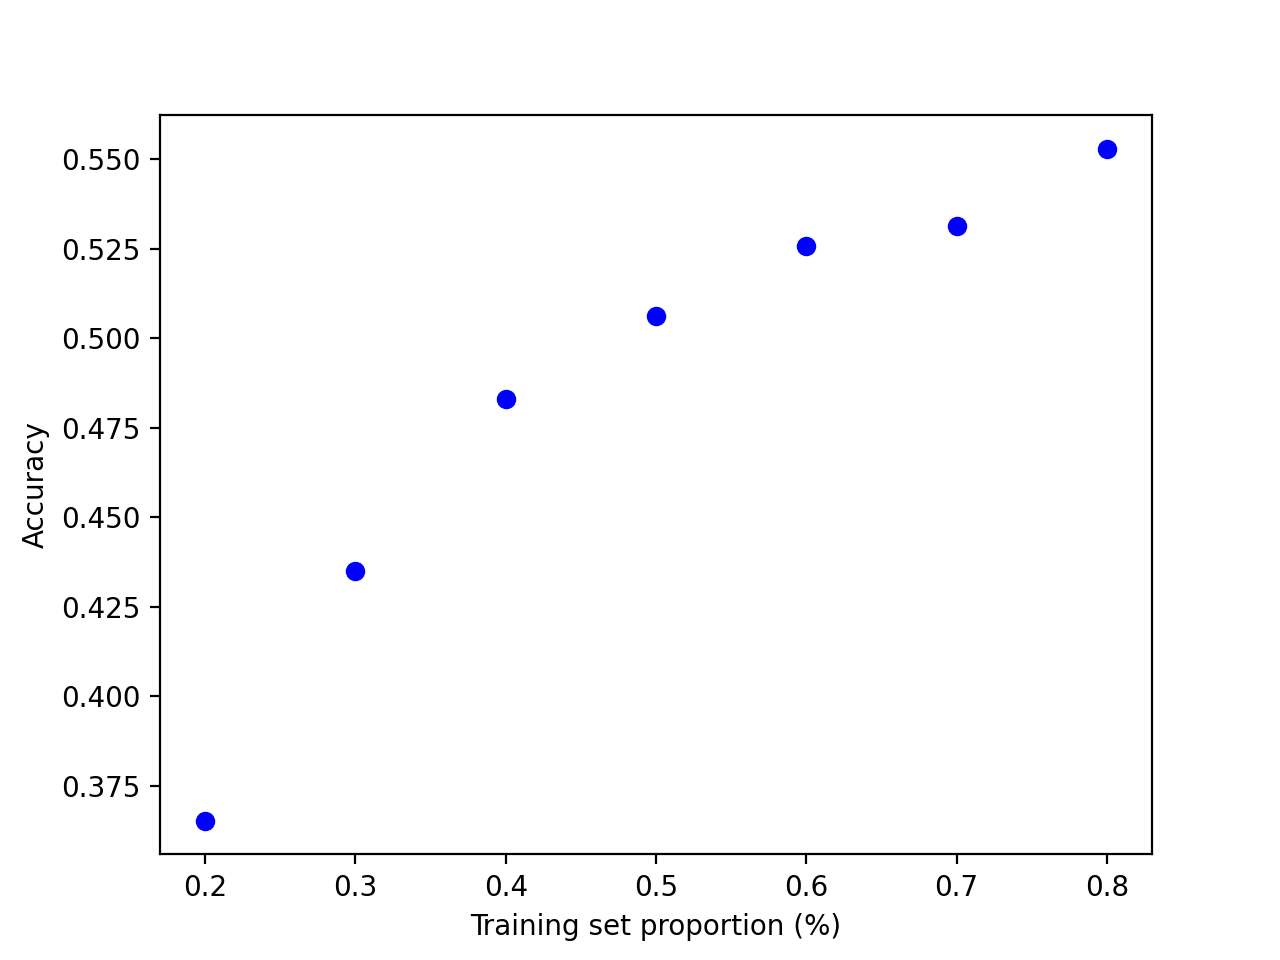

In [22]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors=5)

plt.figure()

for s in t:
    
    scores = []
    for i in range(1, 1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo') # 'bo' - blue 'o' marker
                      
plt.xlabel('Training set proportion (%)')
plt.ylabel('Accuracy');